# Multiple Linear Regression
## BIKE SHARING ASSIGNMENT 
#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Business Goal:

we are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<hr/>

## Reading, Understandong and Visualization 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
#FOR SCALLING 
from sklearn.preprocessing import MinMaxScaler
#FOR VIF CALCULATION 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# FOR R2 EVALUATION 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#sklearn package for liner regression
from sklearn.linear_model import LinearRegression
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  


###  Reading the dataset

In [2]:
#Uploading And understanding the dataset

bike_sharing = pd.read_csv("day.csv")
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Looking at rows and column in dataset

bike_sharing.shape

(730, 16)

### Summary of the dataset 






In [4]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bike_sharing.size

11680

In [7]:
#Checking the Info 
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking for null values 


In [8]:
bike_sharing.isnull().mean()

# No null values found 

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

###  Cleaning the dataSet
      - Droping the Redundant colums form the dataset 

In [9]:
bike_sharing["weekday"]

0      1
1      2
2      3
3      4
4      5
      ..
725    5
726    6
727    0
728    1
729    2
Name: weekday, Length: 730, dtype: int64

# DROPING COLUMNS 
- Instant column is not vital column since it has unique values its like serial number so dropping the column
- Dteday we will drop this column because we have yr and month column
- We will drop casual and registered since cnt is the sum of casual and registered because these are coulmn we need to predict casual and registered user cnt becoms target column


In [10]:
# DROPING THE REDUNDANT COLUMNS
bike_sharing.drop(['casual', 'registered','instant','dteday'], inplace=True, axis = 1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### DROPING HOLIDAY AS DECIDING LATER 

In [11]:
bike_sharing.drop(['holiday'],axis=1,inplace=True)

In [12]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


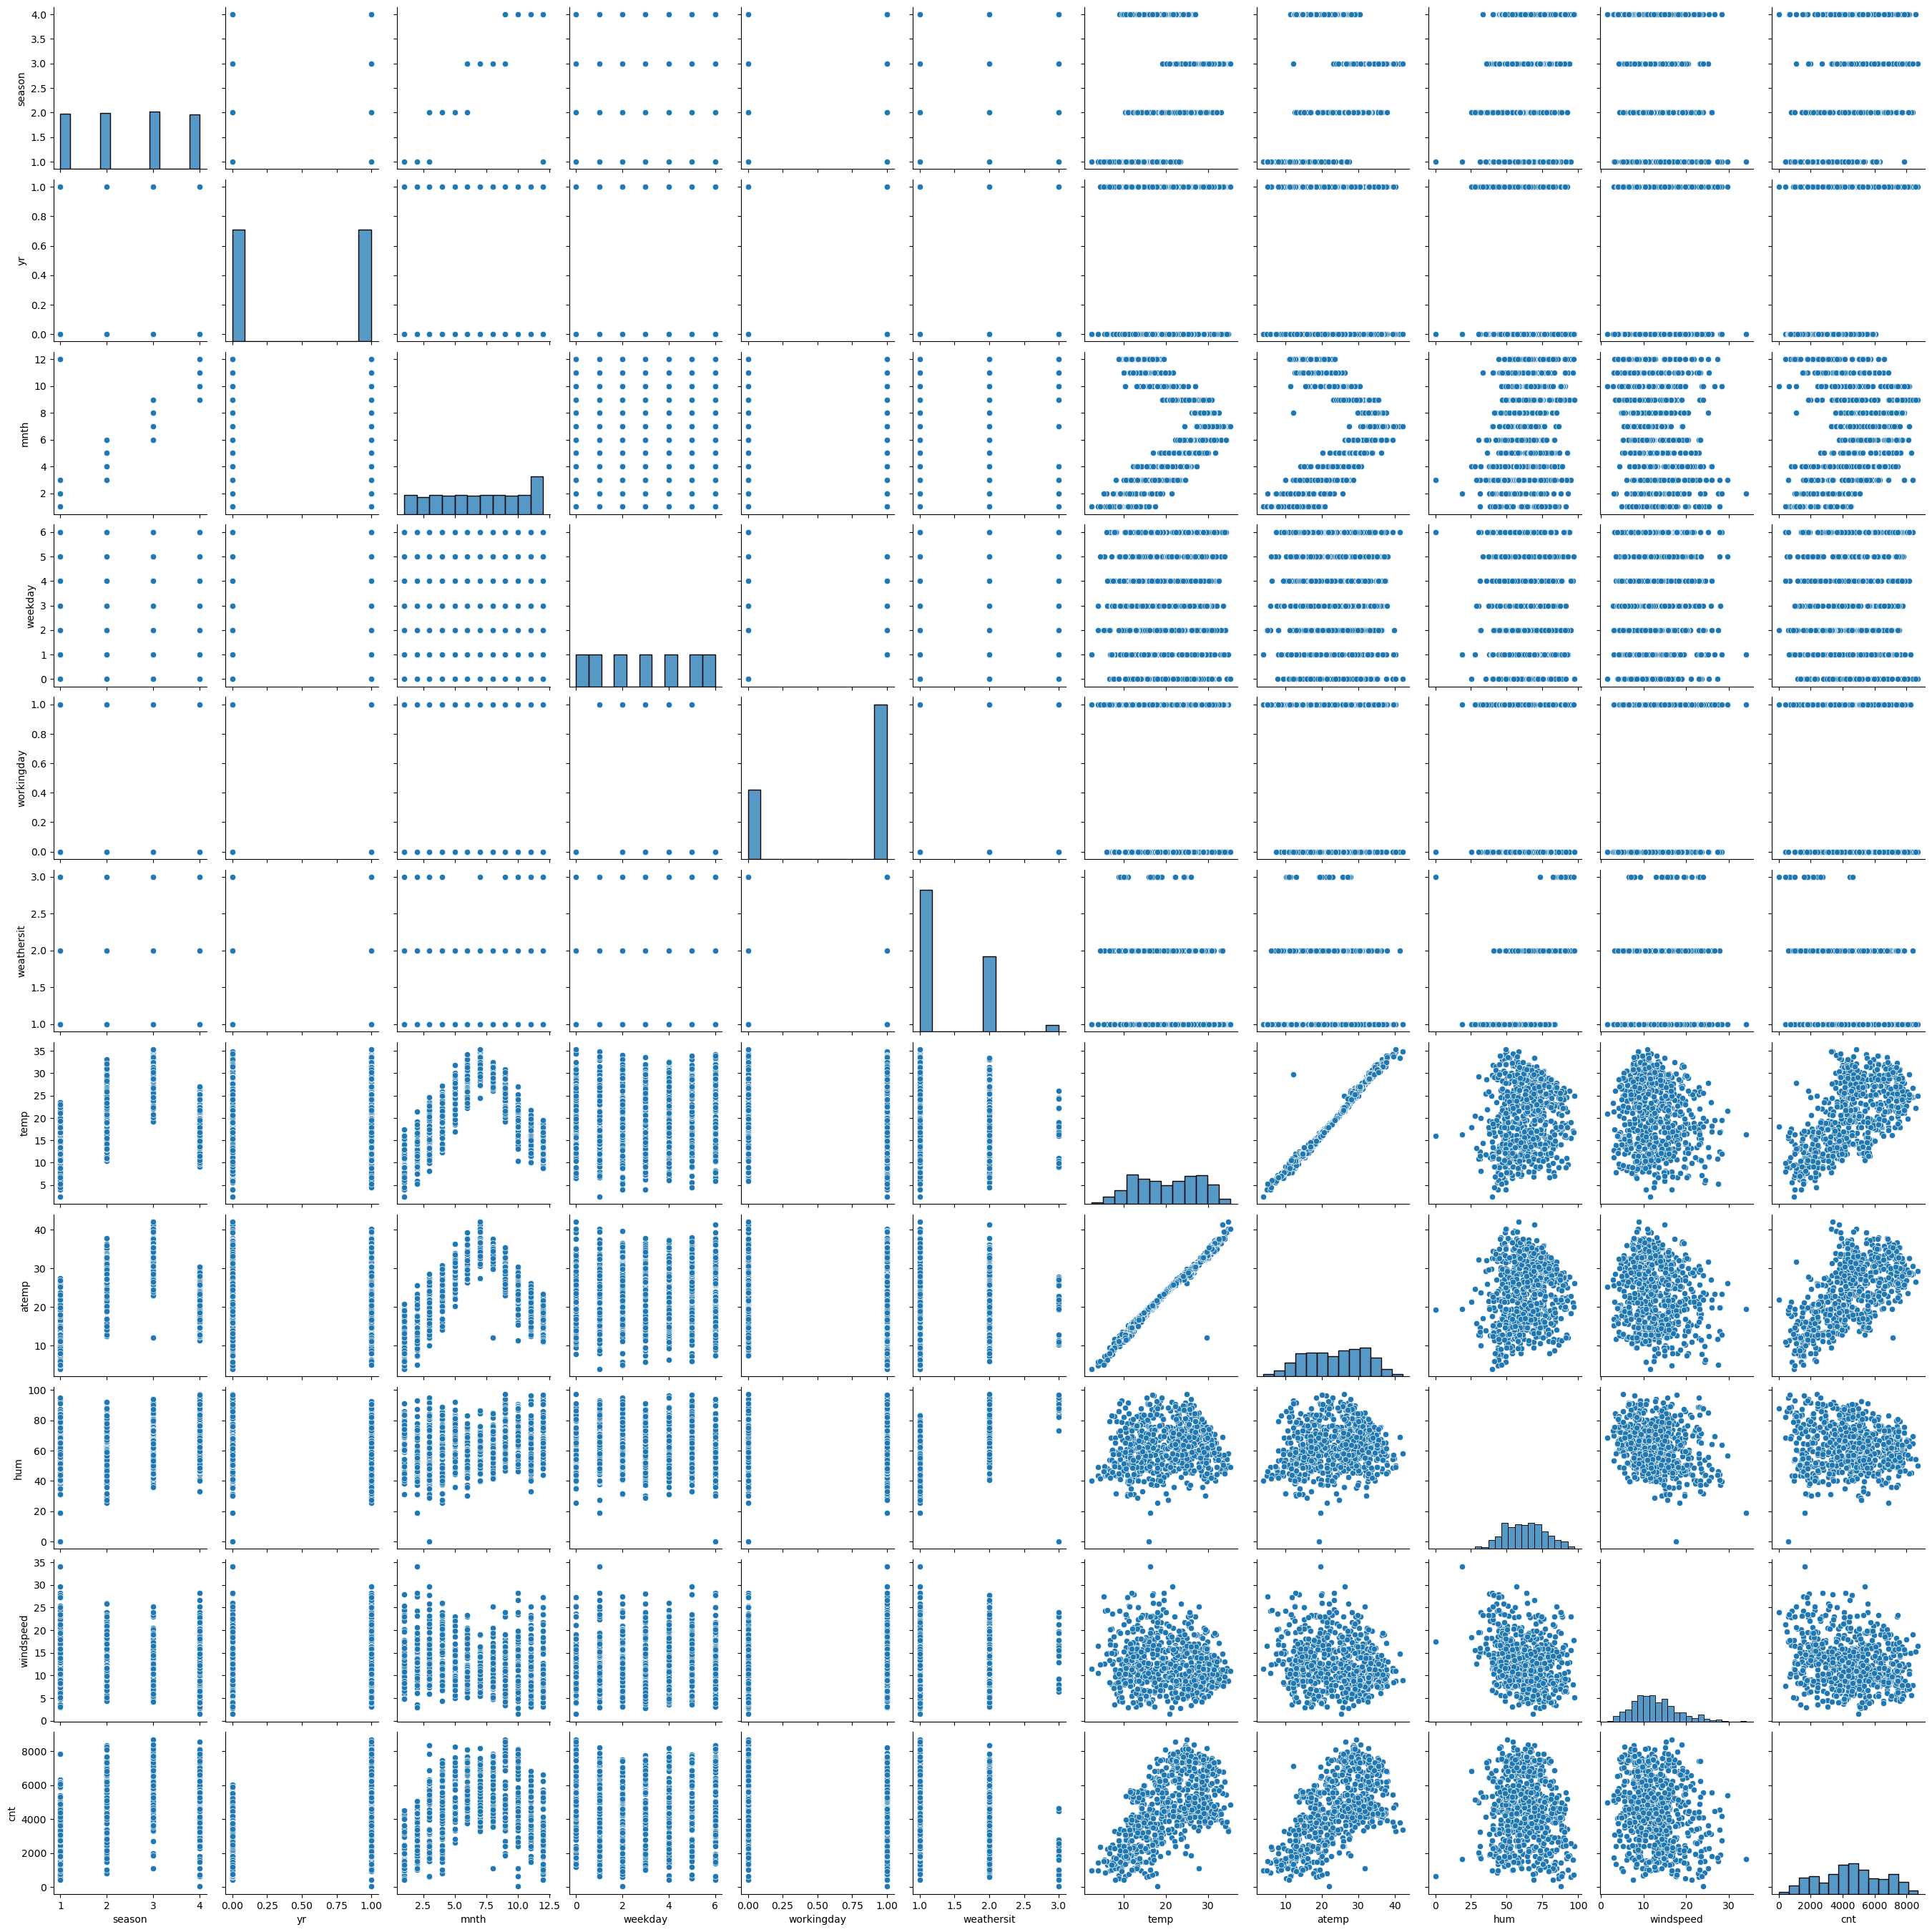

In [13]:
#Visualize the data to check multicollinearity

sns.pairplot(bike_sharing);

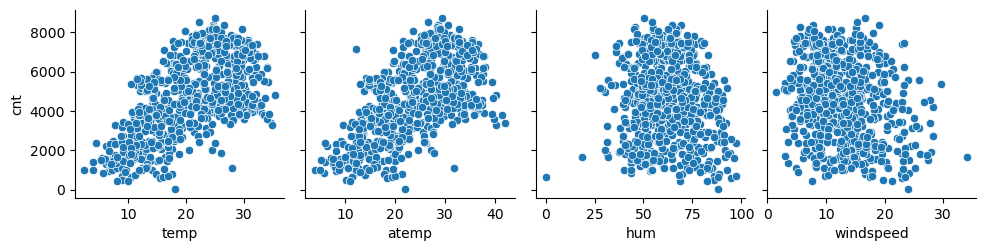

In [14]:
#Visualize the data to check multicollinearity

sns.pairplot(data=bike_sharing, x_vars=['temp', 'atemp', 'hum','windspeed'],y_vars="cnt");
plt.show()

### INFERENCE 
- TEMP AND ATEMP ARE HIGHLY CORELATED WITH CNT VARIABLE 

In [15]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [16]:
bike_sharing["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [17]:
#VISULATIZATION OF CATEGORIC VARIABLE 
# Converting some numerical variables into categorical to gain better insights and meaning from the data
# Season
bike_sharing["season"]=bike_sharing["season"].map({1:"spring",2:"summer",3:"fall",4:"winter"})
# mnth

bike_sharing['mnth'] = bike_sharing['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#weekday
bike_sharing['weekday'] = bike_sharing['weekday'].map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})
# Weathersit
bike_sharing['weathersit'] = bike_sharing['weathersit'].map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light_Snow',4:'Heavy_Rain'})

In [18]:
bike_sharing.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## EDA

### Univaraite Analysis

In [19]:
bike_sharing.select_dtypes(include=object).columns.tolist()

['season', 'mnth', 'weekday', 'weathersit']

In [20]:
bike_sharing.select_dtypes(include=['int64','float64']).columns.tolist()

['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [21]:
num_col=['atemp',"temp","hum","windspeed",'cnt']

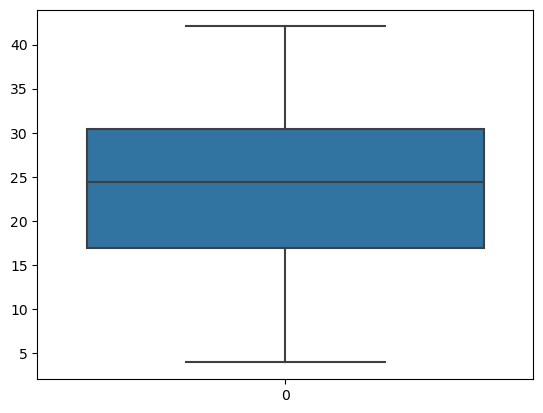

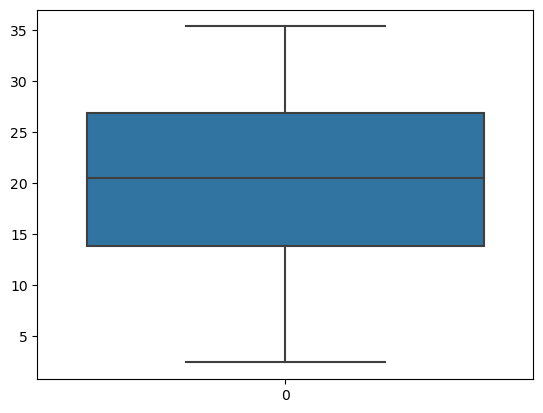

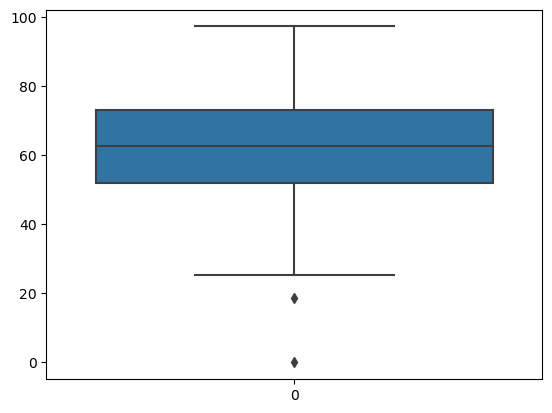

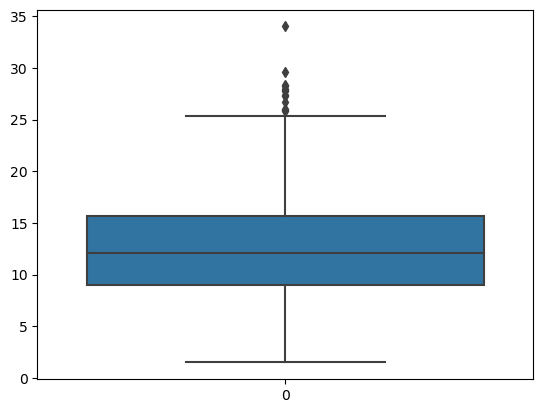

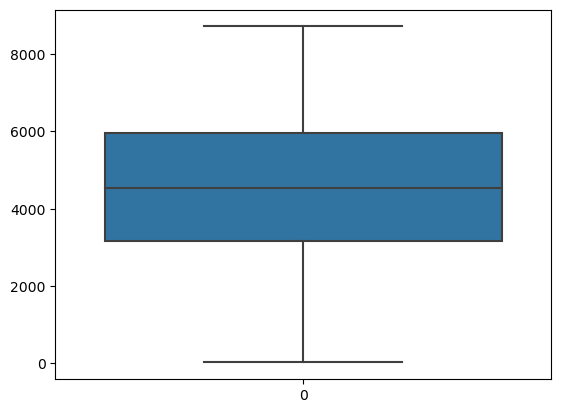

In [22]:
for i in num_col:
    sns.boxplot(bike_sharing[i])
    plt.show()

In [23]:
# As per above plots, we can conclude that there are no outliers to be handled in the dataset

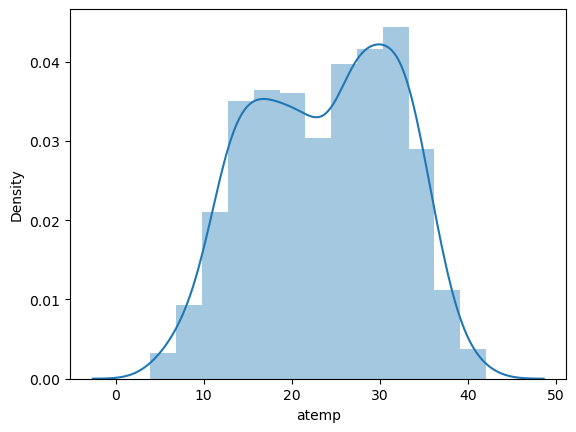

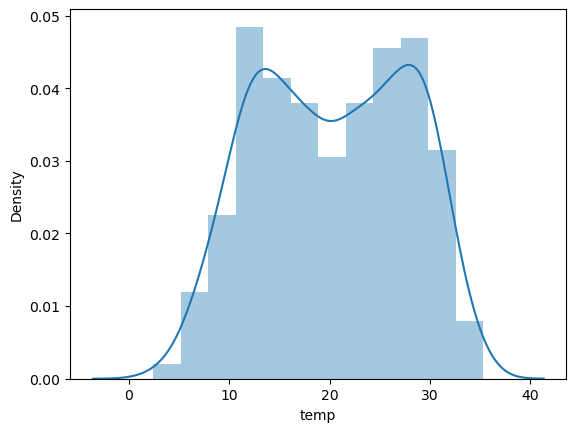

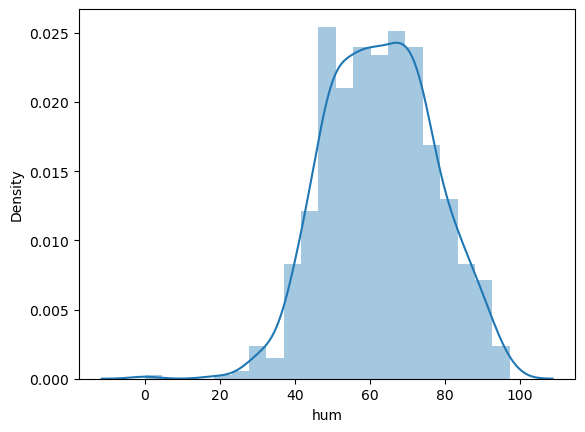

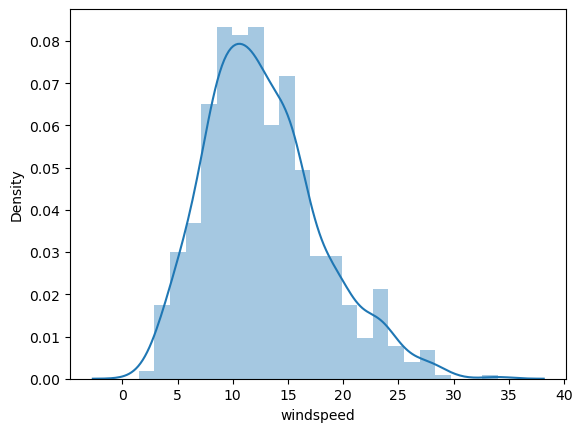

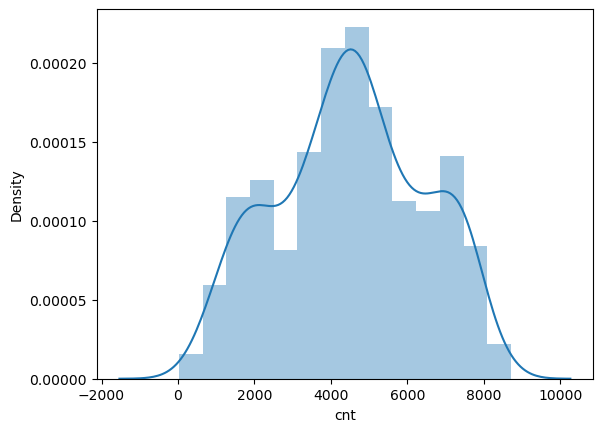

In [24]:
for i in num_col:
    sns.distplot(bike_sharing[i])
    plt.show()

### UNIVARAITE ANALYSIS FOR CATEGORICAL VARIABLES 

In [25]:
cat_col=["season",'yr','mnth','weekday','workingday','weathersit']


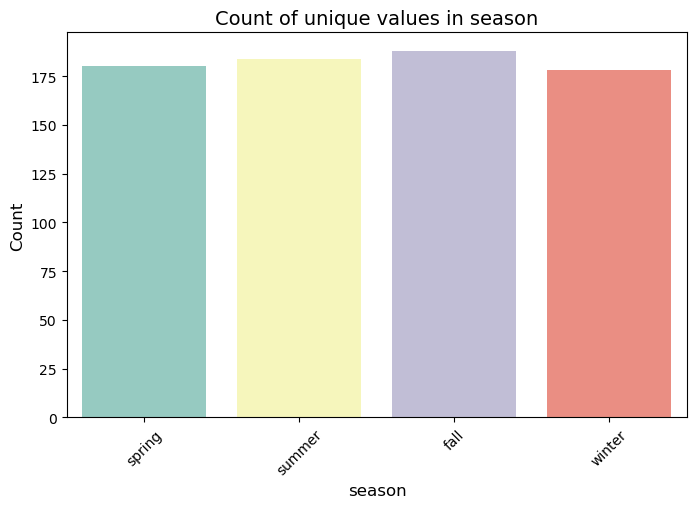

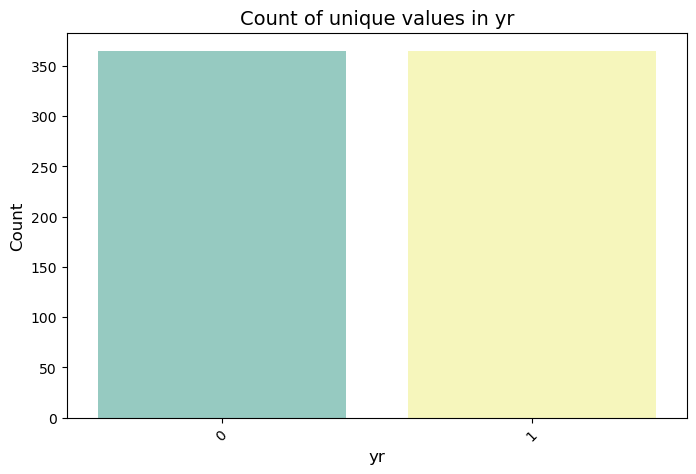

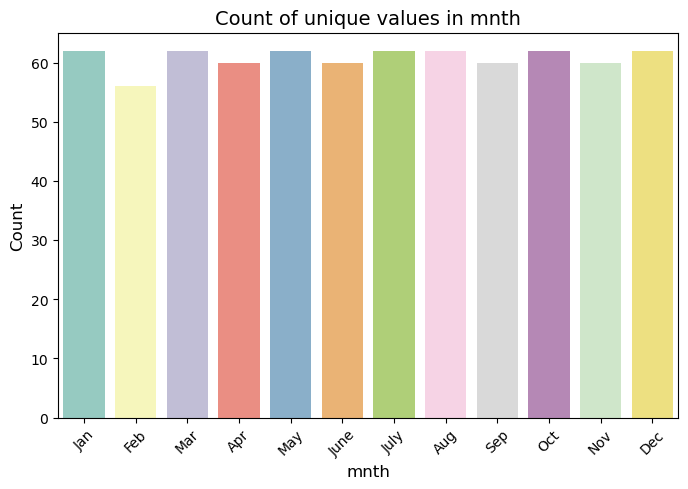

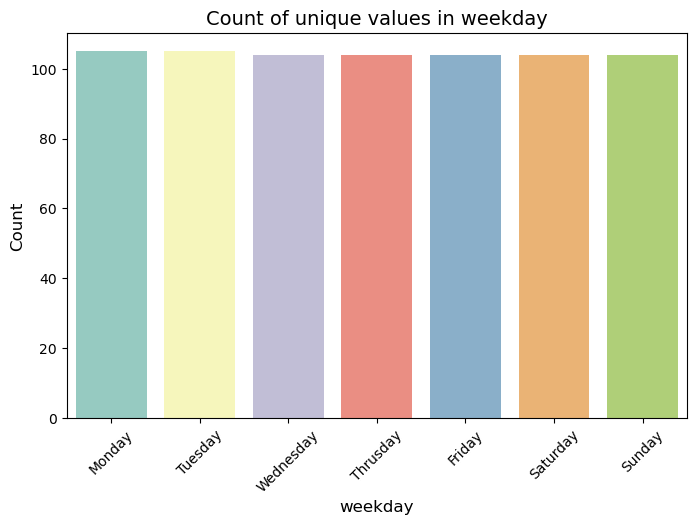

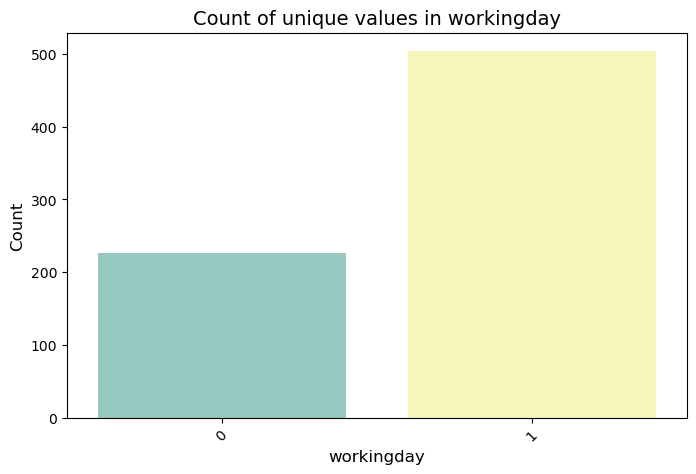

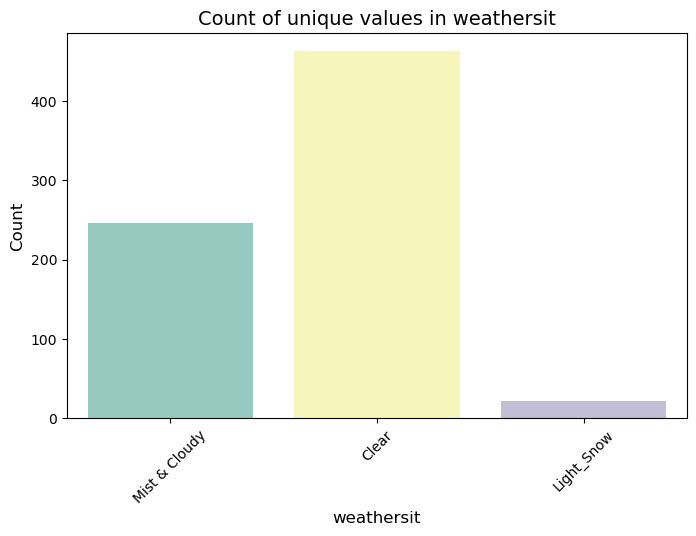

In [26]:
for col in cat_col:
    plt.figure(figsize=(8, 5))  # Set the figure size (optional)
    sns.countplot(data=bike_sharing, x=col, palette="Set3")  # Use 'data' parameter to specify the DataFrame
    plt.title(f"Count of unique values in {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.show()

## BIVARAITE ANALYSIS WITH TARGET VARIABLE AS "CNT"

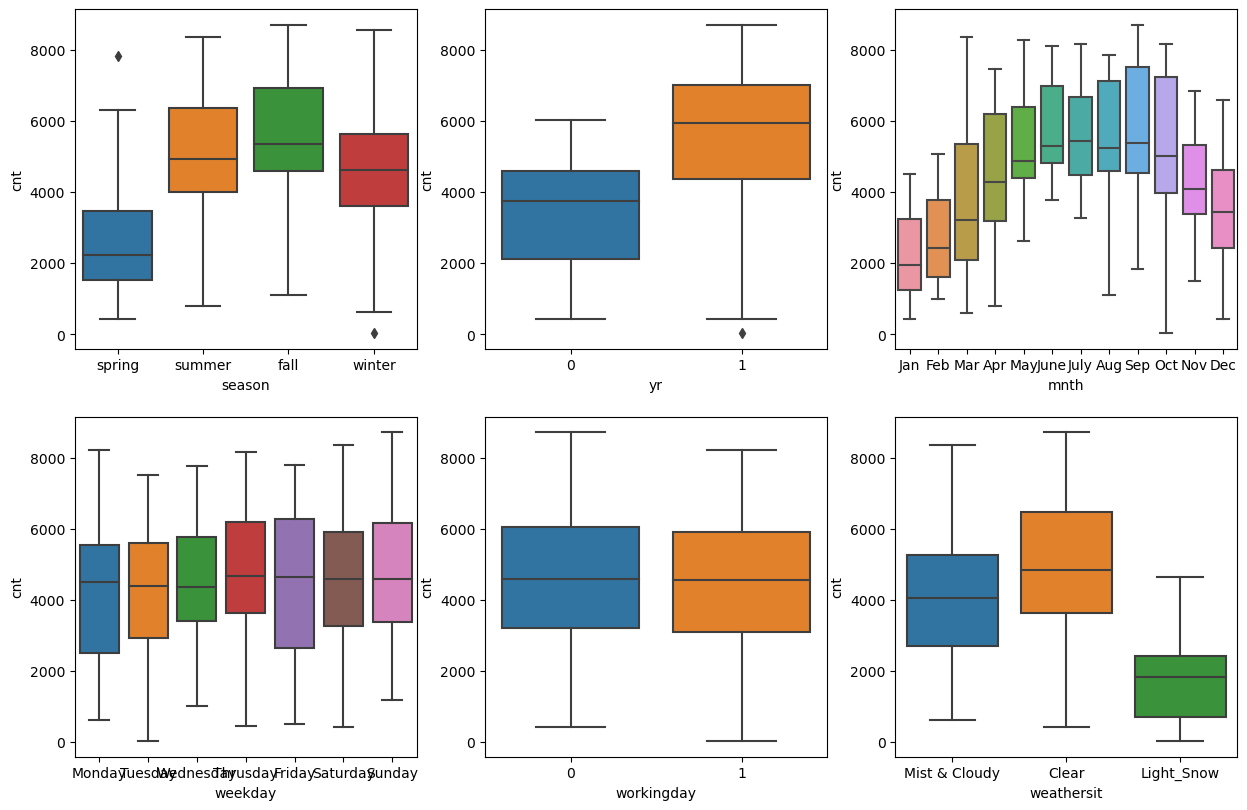

In [27]:
#VISULATIZATION OF CATEGORIC VARIABLE 
cat_col=["season",'yr','mnth','weekday','workingday','weathersit']
plt.figure(figsize=(15,15))
for i in enumerate(cat_col):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_sharing, x=i[1],y="cnt")
plt.show()

## INFERENCE:- 
   - FALL SEASON HAS THE HIGHEST DEMAND OF RENTAL BIKES 
   - DEMAND HAS GROWN FOR THE NEXT YEAR I.E 2019
   - DEMAND HAS CONTINOUSLY GROWN TILL JUNE AND THERE IS FALL FROM SEPT TILL DEC
   - WEEKDAY FRIDAY HAS MOST DEMAND HOWEVER NO PROPER INFERENCE CAN BE TAKEN AT THIS   POINT 
   - THE CLEAR WEATHERSHIT HAS HIGHEST DEMAND.



In [28]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   weekday     730 non-null    object 
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    object 
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 62.9+ KB


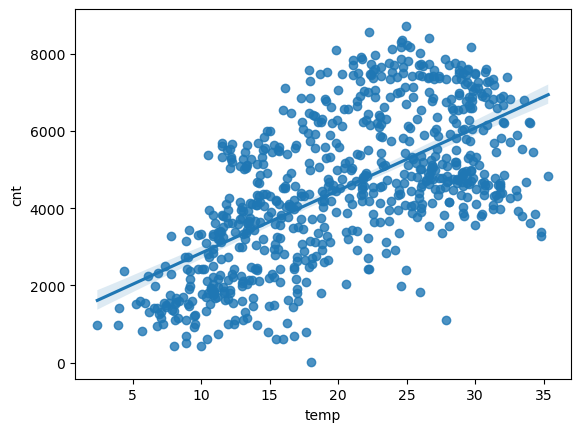

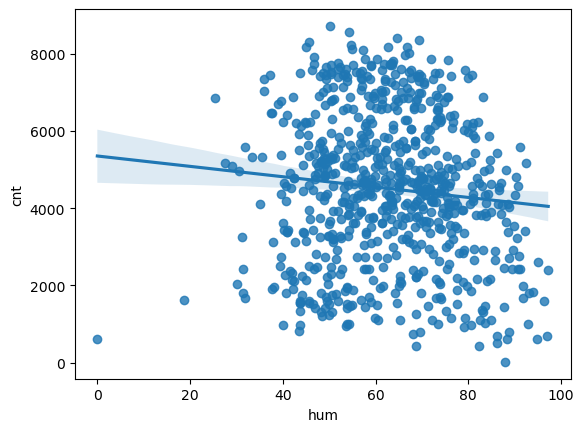

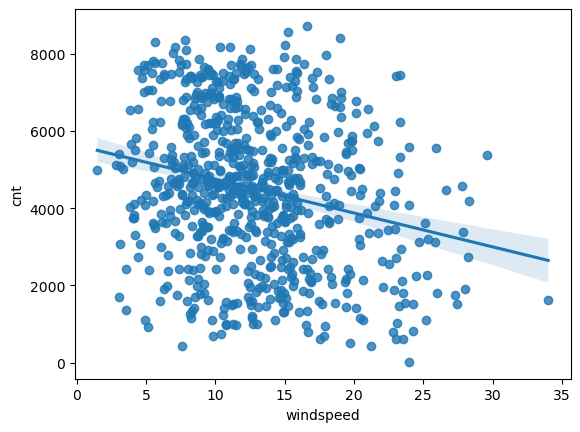

In [29]:
sns.regplot(data=bike_sharing,y="cnt",x="temp")
plt.show()
sns.regplot(data=bike_sharing,y="cnt",x="hum")
plt.show()
sns.regplot(data=bike_sharing,y="cnt",x="windspeed")
plt.show()


###  INFERENCE 
- DEMAND OF BIKE HAS A POSITIVE CORELATION TO TEMP 
- WE CAN SEE DECREASE IN COUNT WITH INCREASE IN HUMIDITY
- THE PLOT IS MORE SCATTERES , HOWEVER WE CAN SEE INCREASE IN WINDSPEED REDUCES THE CNT 

### HeatMap

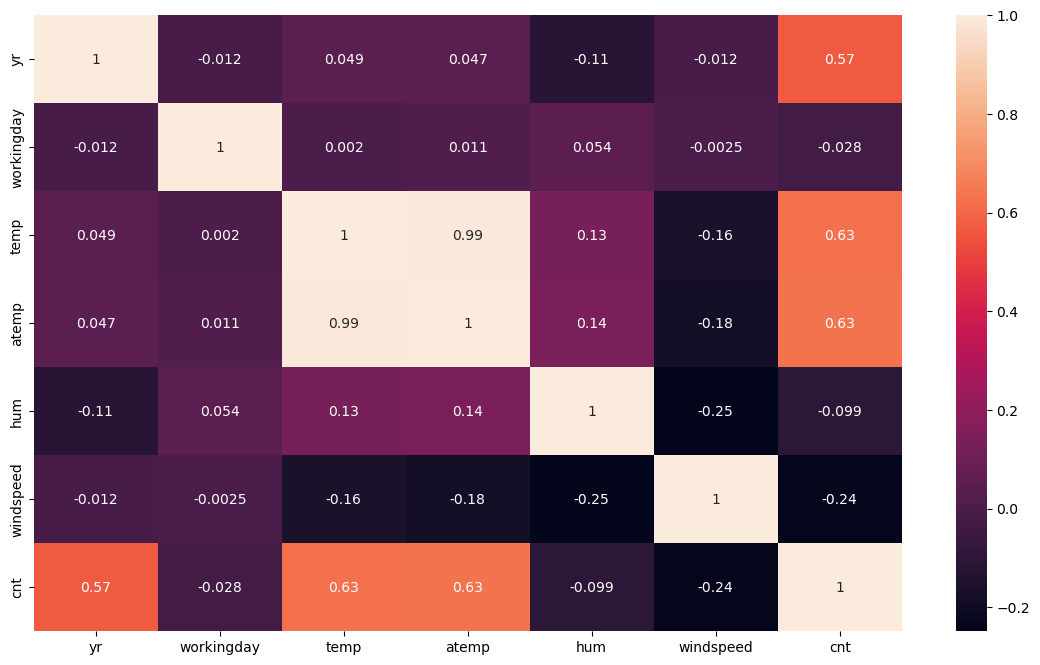

In [30]:
plt.figure(figsize = (14,8))

sns.heatmap(bike_sharing.corr(),annot=True)
plt.show()

### INFERENCE 
- As per the heatmap there is a high corelation between atemp and temp so we have to drop one variable 



In [31]:
bike_sharing.drop(['atemp'], axis = 1, inplace = True)


In [32]:
bike_sharing.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,Monday,1,Mist & Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,Tuesday,1,Mist & Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,Wednesday,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,Thrusday,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,Friday,1,Clear,9.305237,43.6957,12.522300,1600


##  Data Preparation for Linear Regression


#### Create dummy variables for all categorical variables


In [33]:
bike_sharing.select_dtypes(include=object).columns.tolist()

['season', 'mnth', 'weekday', 'weathersit']

In [34]:
dummy = bike_sharing[['season' , 'mnth' , 'weekday' ,'weathersit']]
dummy=pd.get_dummies(dummy,drop_first=True)

#### concat the  data frame with the origical data set 

In [35]:
bike_sharing=pd.concat([bike_sharing,dummy],axis=1)
bike_sharing.drop(['season' , 'mnth' , 'weekday' ,'weathersit'] , axis = 1 , inplace = True)
bike_sharing.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
bike_sharing.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thrusday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_Light_Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

##  Splitting the Data into Training and Testing Sets¶


In [37]:
bike_train,bike_test=train_test_split(bike_sharing,train_size=0.7,random_state=100)

In [38]:
bike_train.shape

(510, 28)

In [39]:
bike_test.shape

(220, 28)

### Rescaling the Features 

We will use MinMax scaling.

In [40]:
# CHECK THE NUMERIC COLUMNS 
for columns in bike_sharing.columns:
    values=bike_sharing[columns].nunique()
    if values > 2:
        print(f"{columns}:Numeric")

temp:Numeric
hum:Numeric
windspeed:Numeric
cnt:Numeric


In [41]:
# Instantiate an object 
scaler=MinMaxScaler()

In [42]:
num_vars = ['temp','hum','windspeed','cnt']


In [43]:
#fit on data 
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

In [44]:
bike_train.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
576,1,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
bike_train.columns.tolist()

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_July',
 'mnth_June',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thrusday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'weathersit_Light_Snow',
 'weathersit_Mist & Cloudy']

In [46]:
bike_train.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
### Dividing into X and Y sets for the model building

In [48]:
y_train=bike_train.pop("cnt")

In [49]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [50]:
X_train=bike_train

In [51]:
X_train.head()

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
576,1,1,0.815169,0.725633,0.264686,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Building our model with all the variables


In [52]:
# BUILD A MODEL WITH ALL THE VARIBLES
X_train_sm=sm.add_constant(X_train)
# create   model with y_train as cnt and all the other varibale
lr=sm.OLS(y_train,X_train_sm)
#fit the model 
lr_model=lr.fit()
#parameter 
lr_model.params
# summary 
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          1.07e-178
Time:                        00:07:09   Log-Likelihood:                 520.75
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     482   BIC:                            -866.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,39.36
2,temp,38.65
1,workingday,25.54
5,season_spring,12.50
7,season_winter,12.16
6,season_summer,8.16
17,mnth_Oct,6.43
8,mnth_Aug,6.36
16,mnth_Nov,6.19
21,weekday_Sunday,6.12


### WE WILL CONSIDER RUNNING WITH RFE MODEL APPROACH

In [54]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=14) # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 6),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [56]:
col= X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light_Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [58]:
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_July', 'mnth_Sep',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light_Snow',
       'weathersit_Mist & Cloudy'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### MODEL 1 

In [59]:
X_train_rfe = X_train[col]

In [60]:
X_train_rfe

,yr,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_July,mnth_Sep,weekday_Saturday,weekday_Sunday,weathersit_Light_Snow,weathersit_Mist & Cloudy
576,1,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,1,0.248216,0.577930,0.431816,0,0,1,0,0,0,0,0,1
79,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


In [61]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model


In [62]:
#summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          7.16e-188
Time:                        00:07:11   Log-Likelihood:                 509.19
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     495   BIC:                            -924.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [63]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,123.79
2,workingday,9.94
12,weekday_Sunday,6.45
11,weekday_Saturday,6.19
6,season_spring,5.03
3,temp,3.62
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.91
14,weathersit_Mist & Cloudy,1.58


## --------------------------------------------------------------------

### MODEL-2

In [64]:
## droping constant since the value is too high

In [65]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [67]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [68]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     188.2
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          7.16e-188
Time:                        00:07:12   Log-Likelihood:                 509.19
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     495   BIC:                            -924.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [69]:
#Since the P value are in significant we have to check VIF 
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.35
1,workingday,20.95
2,temp,19.28
4,windspeed,4.97
5,season_spring,4.87
11,weekday_Sunday,4.77
10,weekday_Saturday,4.60
7,season_winter,3.78
6,season_summer,3.06
13,weathersit_Mist & Cloudy,2.33


### MODEL-3

In [70]:
## DROPPING "hum" variable since VIF is high

In [71]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [72]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          5.10e-185
Time:                        00:07:13   Log-Likelihood:                 499.65
No. Observations:                 510   AIC:                            -971.3
Df Residuals:                     496   BIC:                            -912.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,18.16
2,temp,13.27
3,windspeed,4.80
10,weekday_Sunday,4.32
9,weekday_Saturday,4.17
4,season_spring,3.93
6,season_winter,2.94
5,season_summer,2.80
0,yr,2.07
7,mnth_July,1.60


### MODEL-4 

In [74]:
# SINCE P VALUE ARE FINE BUT THE VIF OF WORKINGDAY IS HIGH SO WE WILL DROP "WORKINGDAY"

In [75]:
X_train_new = X_train_new.drop(['workingday'], axis=1)

In [76]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          3.89e-184
Time:                        00:07:13   Log-Likelihood:                 494.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [77]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.22
2,windspeed,4.61
4,season_summer,2.23
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.77
6,mnth_July,1.59
11,weathersit_Mist & Cloudy,1.56
7,mnth_Sep,1.33
9,weekday_Sunday,1.19


### MODEL-5

In [78]:
# SINCE THE P VALUE OF weekday_Saturday is high therefore, we will drop this variable 

In [79]:
X_train_new = X_train_new.drop(['weekday_Saturday'], axis=1)

In [80]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          7.73e-185
Time:                        00:07:14   Log-Likelihood:                 493.63
No. Observations:                 510   AIC:                            -963.3
Df Residuals:                     498   BIC:                            -912.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [81]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.61
4,season_summer,2.23
0,yr,2.07
3,season_spring,2.07
5,season_winter,1.77
6,mnth_July,1.59
10,weathersit_Mist & Cloudy,1.56
7,mnth_Sep,1.33
8,weekday_Sunday,1.17


### MODEL-6

In [82]:
# SINCE THE P VALUE OF weekday_Sunday   is high therefore, we will drop this variable 

In [83]:
X_train_new = X_train_new.drop(['weekday_Sunday'], axis=1)

In [84]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          3.00e-185
Time:                        00:07:14   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [85]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,season_summer,2.23
0,yr,2.07
3,season_spring,2.07
5,season_winter,1.77
6,mnth_July,1.58
9,weathersit_Mist & Cloudy,1.55
7,mnth_Sep,1.33
8,weathersit_Light_Snow,1.08


## MODEL -7 

In [86]:
# In comparision to other variables I find "mnth_july" less significant in comparision to "temp" variable, therfore
# dropping this variable

In [87]:
X_train_new = X_train_new.drop(['mnth_July'], axis=1)

In [88]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     267.8
Date:                Sun, 30 Jul 2023   Prob (F-statistic):          6.51e-185
Time:                        00:07:15   Log-Likelihood:                 488.06
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     500   BIC:                            -913.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [89]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.59
1,temp,3.84
0,yr,2.07
3,season_spring,1.98
4,season_summer,1.90
5,season_winter,1.61
8,weathersit_Mist & Cloudy,1.55
6,mnth_Sep,1.22
7,weathersit_Light_Snow,1.08


## Residual Analysis of The Train Data

In [90]:
y_train_count = lm.predict(X_train_lm)

In [91]:
y_train_count

576    0.774302
426    0.462049
728    0.383573
482    0.569833
111    0.282640
         ...   
578    0.809292
53     0.211378
350    0.257803
79     0.316299
520    0.642178
Length: 510, dtype: float64

In [92]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

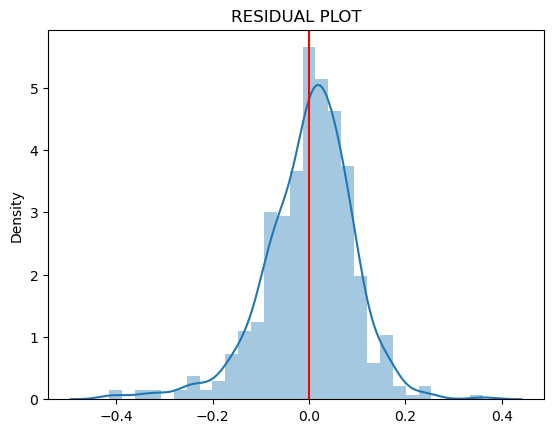

In [93]:
res=y_train-y_train_count
sns.distplot(res) 
# Plot heading 
plt.title("RESIDUAL PLOT")
plt.axvline(x=res.mean(),color='red');
plt.show()

In [94]:
sum(res)

-1.2743139876647547e-12

## Making Predictions on Test Data 

In [95]:
num_vars = ['temp','hum','windspeed','cnt']

- since we are using  test dataset  so will use transform 

In [96]:
bike_test[num_vars] =scaler.transform(bike_test[num_vars])

In [97]:
bike_test.head()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
184,0,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [98]:
bike_sharing.describe()

,yr,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist & Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,0.243836,0.084932,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.028767,0.336986
std,0.500343,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,0.429689,0.278971,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.167266,0.473004
min,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
y_test = bike_test.pop('cnt')  # since it is the target variable
X_test = bike_test

In [100]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [101]:
X_test_new.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_Sep,weathersit_Light_Snow,weathersit_Mist & Cloudy
184,1.0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0


In [102]:
# Making predictions
y_pred = lm.predict(X_test_new)

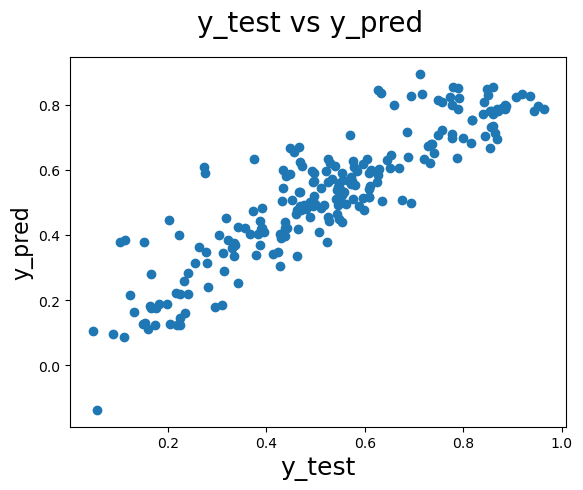

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
#sns.regplot(data=X_test_new,y="y_test",x="y_pred")
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  ;       

### CALCULATION OF R2

In [104]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.8009599227555846

### ADJUSTED R2 

In [105]:
X_test.shape

(220, 27)

In [106]:
# n is number of rows in X

n = X_test.shape[0]

# Number of features (p) 
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7729699118930887

### R2 VALUES TOGETHER

In [107]:
print('Train R2: ' ,r2_score(y_train,y_train_count))  # R2 for train data
print('Test R2: ' ,r2_score(y_test, y_pred))  #R2 for test data
print('Test Adj R2:',adjusted_r2 )        # Adj R2 for test data 

Train R2:  0.8281967362639397
Test R2:  0.8009599227555846
Test Adj R2: 0.7729699118930887


### FINAL REPORT
- AS PER THE VALUES THERE IS NOT MUCH DIFFERENCE IN R2 and Adj R2 so we finally conclude that model is fit and acceptable

## -----------------------------------------------------------------------------------------------------------------------------